# Building a YES/NO link between clothing and shoes

In [ ]:
# %load_ext autoreload
# %autoreload 2

import os
import numpy as np
import random
from loading import load_files

from visuals import view_two_images

%matplotlib inline

### Manual Labeling of clothing -> shoe of yes/no

In [ ]:
# get all files for a provided path
# def get_paths(path):
#     data = load_files(path, ignore_files='.DS_Store')
#     clothing_files = np.array(data['filenames'])
#     return clothing_files

In [ ]:
# get all files for specific paths
def specific_paths(cloth_cat, shoe_cat):
    all_cloth_paths = []
    cloth_path = '../data/clothing2/' + cloth_cat
    cloth_files = os.listdir(cloth_path)
    for file in cloth_files:
        all_cloth_paths.append(cloth_path + file)
        
    all_shoe_paths = []
    shoe_path = '../data/shoes/' + shoe_cat
    shoe_files = os.listdir(shoe_path)
    for file in shoe_files:
        all_shoe_paths.append(shoe_path + file)    
    return all_cloth_paths, all_shoe_paths

In [ ]:
clothing_train, shoe_train = specific_paths('train/black_skinny_jeans/', 'train/athletic/')
clothing_test, shoe_test = specific_paths('test/black_skinny_jeans/', 'test/athletic/')
clothing_valid, shoe_valid = specific_paths('validate/black_skinny_jeans/', 'validate/athletic/')
clothing = clothing_train + clothing_test + clothing_valid
shoes = shoe_train + shoe_test + shoe_valid
print(len(clothing), len(shoes))

In [ ]:
# clothing_train, shoe_train2 = specific_paths('train/red_short_dresses/', 'train/flats/')
# clothing_test, shoe_train3 = specific_paths('test/red_short_dresses/', 'validate/flats/')
clothing_valid, shoe_train4 = specific_paths('validate/red_short_dresses/', 'train/sandals/')
clothing_valid, shoe_train5 = specific_paths('validate/red_short_dresses/', 'validate/sandals/')
# clothing = clothing_train + clothing_test + clothing_valid
shoes += shoe_train4 + shoe_train5 #+ shoe_train4 + shoe_train5
print(len(clothing), len(shoes))

# NOTE TO SELF 
**continue with long sleeve tops...**

In [ ]:
# from pathlib import Path

# def say_no_to_the_shoe(shoe_path):
#     """Makes a response of no of every dress to a particular shoe"""
#     file = open('../data/links.txt', 'a')
#     response = 0
#     for file_path in Path('../data/clothing2').glob('**/*.jpg'):
#         file.write(f'{file_path},{shoe_path},{0}\n')
#     file.close()

In [ ]:
# !wc -l ../data/links.txt

In [ ]:
# say_no_to_the_shoe('../data/shoes/train/sandals/8080694.392753.jpg')

In [ ]:
# !wc -l ../data/links.txt

In [ ]:
i = 34 

In [ ]:
path1 = clothing[i]
if '.DS_Store' in path1:
    i += 1
    path1 = clothing[i]
    
path2 = random.sample(shoes, 1)[0]
if '.DS_Store' in path1:
    path2 = random.sample(shoes, 1)[0]
view_two_images(path1, path2)

In [ ]:
# provide a response of 1/0 if the items go together
response = input()
assert (response == '0' or response == '1')
if response == '1':
    i += 1
# file = open('../data/links.txt','a') 
# file.write(f'{path1},{path2},{response}') 
# file.write('\n')
# file.close()

In [ ]:
i

In [ ]:
import pandas as pd
df = pd.read_csv('../data/links.txt')

In [ ]:
print(df.shape)
df.head()

In [ ]:
df['response'].value_counts()

# Label Shoes with the nearest average color

In [1]:
from glob import glob
import color_extractor
import pandas as pd
import pickle

In [4]:
wildroot = '../data/shoes/*/*/*.jpg'
shoe_paths = glob(wildroot)
len(shoe_paths)

22215

In [20]:
shoe_cats = {'ankle_boots': 1, 
             'athletic': 2, 
             'calf_boots': 3, 
             'flats': 4, 
             'heels': 5, 
             'knee_boots': 6, 
             'sandals': 7}


In [27]:
shoe_tags = []
for path in shoe_paths:
    try:
        folder = path.split('/')[3]
        sub_folder = path.split('/')[4]
        num, color = color_extractor.classify_image(path)
        new_cat = str((num+1)) + str(shoe_cats[sub_folder])
        shoe_tags.append((folder, path, new_cat, sub_folder, color))
    except IndexError:
        print(path)

In [28]:
shoe_tags_df = pd.DataFrame(shoe_tags, columns=['type', 'path', 'class', 'shoe_type', 'color'])
pickle.dump(shoe_tags_df, open("saved_models/shoe_tags_df.pickle", "wb" ))
print(shoe_tags_df.shape)
shoe_tags_df.head()

(22215, 5)


,type,path,class,shoe_type,color
0,validate,../data/shoes/validate/calf_boots/7838888.6.jpg,23,calf_boots,grape
1,validate,../data/shoes/validate/calf_boots/7677053.325.jpg,43,calf_boots,charcoal
2,validate,../data/shoes/validate/calf_boots/8024575.6357...,43,calf_boots,charcoal
3,validate,../data/shoes/validate/calf_boots/8075982.278.jpg,63,calf_boots,brownish
4,validate,../data/shoes/validate/calf_boots/8036333.84.jpg,43,calf_boots,charcoal


In [36]:
shoe_labels = pd.get_dummies(shoe_tags_df, prefix='class', columns=['class'])
pickle.dump(shoe_labels, open("saved_models/shoe_labels_df.pickle", "wb" ))
shoe_labels

,type,path,shoe_type,color,class_11,class_12,class_13,class_14,class_15,class_16,...,class_75,class_76,class_77,class_81,class_82,class_83,class_84,class_85,class_86,class_87
0,validate,../data/shoes/validate/calf_boots/7838888.6.jpg,calf_boots,grape,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,validate,../data/shoes/validate/calf_boots/7677053.325.jpg,calf_boots,charcoal,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,validate,../data/shoes/validate/calf_boots/8024575.6357...,calf_boots,charcoal,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,validate,../data/shoes/validate/calf_boots/8075982.278.jpg,calf_boots,brownish,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,validate,../data/shoes/validate/calf_boots/8036333.84.jpg,calf_boots,charcoal,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,validate,../data/shoes/validate/calf_boots/7999982.3.jpg,calf_boots,charcoal,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,validate,../data/shoes/validate/calf_boots/7165047.3527...,calf_boots,taupe,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,validate,../data/shoes/validate/calf_boots/101191.24883...,calf_boots,light grey,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,validate,../data/shoes/validate/calf_boots/7845440.3.jpg,calf_boots,charcoal,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,validate,../data/shoes/validate/calf_boots/7792157.3527...,calf_boots,brownish,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
len(shoe_tags_df['class'].value_counts(dropna=False))

56

In [16]:
shoe_tags_df['color'].value_counts(dropna=False)

charcoal      9960
brownish      3660
taupe         2564
grape         1901
slate         1652
light grey    1115
beige          817
brick red      546
Name: color, dtype: int64

In [30]:
# import os 
# rejects = shoe_tags_df[shoe_tags_df['class'].isin(['76'])]
# rejects
# # for path in rejects['path']:
# #     os.remove(path)

,type,path,class,shoe_type,color
1791,validate,../data/shoes/validate/knee_boots/8027683.401.jpg,76,knee_boots,light grey
3919,test,../data/shoes/test/knee_boots/8072821.1892.jpg,76,knee_boots,light grey
18665,train,../data/shoes/train/knee_boots/7981466.4086.jpg,76,knee_boots,light grey
18873,train,../data/shoes/train/knee_boots/7976458.1162.jpg,76,knee_boots,light grey
19256,train,../data/shoes/train/knee_boots/8024788.19429.jpg,76,knee_boots,light grey
19438,train,../data/shoes/train/knee_boots/8015001.1892.jpg,76,knee_boots,light grey
19635,train,../data/shoes/train/knee_boots/8003690.419.jpg,76,knee_boots,light grey
19806,train,../data/shoes/train/knee_boots/8072841.1892.jpg,76,knee_boots,light grey
19808,train,../data/shoes/train/knee_boots/8072840.1892.jpg,76,knee_boots,light grey
19891,train,../data/shoes/train/knee_boots/7970229.43774.jpg,76,knee_boots,light grey


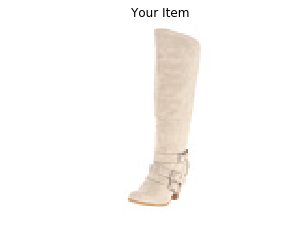

In [32]:
import visuals
visuals.view_one_image('../data/shoes/train/knee_boots/8072841.1892.jpg')

# Label Shoes with the nearest average color

In [ ]:
from glob import glob
import color_extractor
import pandas as pd
import pickle

In [ ]:
wildroot = '../data/shoes/*/*/*.jpg'
shoe_paths = glob(wildroot)
len(shoe_paths)

In [ ]:
shoe_cats = {'ankle_boots': 1, 
             'athletic': 2, 
             'calf_boots': 3, 
             'flats': 4, 
             'heels': 5, 
             'knee_boots': 6, 
             'sandals': 7}


In [ ]:
shoe_tags = []
for path in shoe_paths:
    try:
        folder = path.split('/')[3]
        sub_folder = path.split('/')[4]
        num, color = color_extractor.classify_image(path)
        new_cat = str((num+1)) + str(shoe_cats[sub_folder])
        shoe_tags.append((folder, path, new_cat, sub_folder, color))
    except IndexError:
        print(path)

In [ ]:
shoe_tags_df = pd.DataFrame(shoe_tags, columns=['type', 'path', 'class', 'shoe_type', 'color'])
pickle.dump(shoe_tags_df, open("saved_models/shoe_tags_df.pickle", "wb" ))
print(shoe_tags_df.shape)
shoe_tags_df.head()

In [ ]:
shoe_labels = pd.get_dummies(shoe_tags_df, prefix='class', columns=['class'])
pickle.dump(shoe_labels, open("saved_models/shoe_labels_df.pickle", "wb" ))
shoe_labels

In [ ]:
len(shoe_tags_df['class'].value_counts(dropna=False))

In [ ]:
shoe_tags_df['color'].value_counts(dropna=False)

In [ ]:
# import os 
# rejects = shoe_tags_df[shoe_tags_df['class'].isin(['76'])]
# rejects
# # for path in rejects['path']:
# #     os.remove(path)

In [ ]:
import visuals
visuals.view_one_image('../data/shoes/train/knee_boots/8072841.1892.jpg')

5.0